### Welcome to the Airbnb Mini Practice Project

As you've worked through Python Sub Unit you would have realised there are a number of powerful functions you can use.

You would have covered the following libraries:

<li> Matplotlib </li>
<li> Seaborn </li>
<li> Pandas </li> 
    
These are all powerful libraries to help augment your data analysis capabilities.
In these set of exercises below, we've crafted a few extra challenges to reinforce your understanding of how these libraries work. 

Please note there is a particular emphasis on the Pandas Library as this is the most critical library you will be using throughout your career as a data analyst. You'll see the similarities that hold with respect to Pandas and Pivot Tables!
    
<b> The most important thing to build confidence with Python is to practice all the time. This way you will build muscle memory. Don't simply copy the code you've written previously but write it again and again so you build the muscle memory associated with these coding libraries. </b> 

<H3>  Let's get started! </H3>

We've provided a file called airbnb_2.csv that you'll need to import.

Let's do this first before we start our analysis.

<b> Don't forget to import the libraries you need to read .csv files! </b> 



### Step 1: <span style="color:green">Import Libraries</span> 
<b> Put your code in the box below </b>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 8

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

Now that you have the Pandas Libraries imported, it's time to import the airbnb dataset.

<b> i) Please import the airbnb dataset.

ii) Upon completion of this, use .info() to better understand the variables inside your dataset.
<p>    

<b> Put your code in the box below </b>

In [2]:
df = pd.read_csv(r"C:\Users\gmwin\Desktop\Springboard Stuff local\Airbnb Case Study\airbnb_2.csv")
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

### Step 3: <span style="color:green">Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> i)  Please count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>
<p>
    <b> Put your code in the box below </b>

In [3]:
df['neighbourhood_group'].value_counts(sort=True)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>

<b> Put your code in the box below </b>

In [4]:
df['neighbourhood_group'].value_counts(sort=True, normalize=True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

<b> iii) Create a new calculated field called Revenue and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

<b> Put your code in the box below </b>

In [5]:
df['revenue'] = df['price'] * df['number_of_reviews']
df['revenue']

0         1341
1        10125
2            0
3        24030
4          720
         ...  
48890        0
48891        0
48892        0
48893        0
48894        0
Name: revenue, Length: 48895, dtype: int64

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

If you're stuck, we recommend you go back to <a href = https://learn.datacamp.com/courses/manipulating-dataframes-with-pandas> this </a> datacamp link. Specifically Chapter 4 which covers how GROUP BY is used in Pandas.

<b> Put your code in the box below </b>

<AxesSubplot:xlabel='neighbourhood_group', ylabel='revenue'>

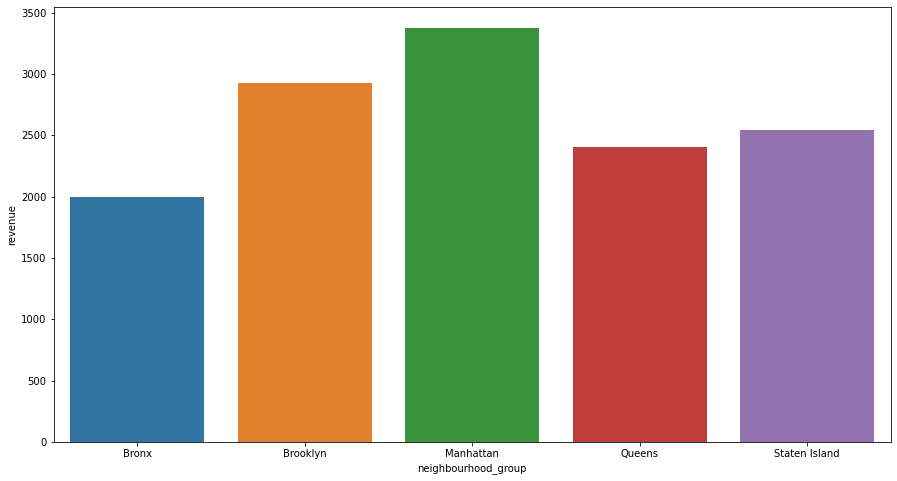

In [6]:
rev_by_group = pd.DataFrame(df.groupby('neighbourhood_group')['revenue'].mean())
sns.barplot(x=rev_by_group.index, y=rev_by_group['revenue'])

<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups Manhattan, Brookly and Queens. 
    
Upon completion of this, identify the top 3 Revenue Generating Neighborhoods within each of the three Neighbourhood_Groups. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This is a tricky question that will *test* your group-by skills.

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
<b> Put your code in the box below </b>

In [7]:
condition1 = df['neighbourhood_group'] == 'Manhattan'
condition2 = df['neighbourhood_group'] == 'Brooklyn'
condition3 = df['neighbourhood_group'] == 'Queens'

neighbourhood_grp = df[condition1 | condition2 | condition3]
neighbourhood_grp['neighbourhood_group'].value_counts()

Manhattan    21661
Brooklyn     20104
Queens        5666
Name: neighbourhood_group, dtype: int64

In [8]:
filtered_neighbourhood_grp = neighbourhood_grp.drop(['id', 'name', 'host_name', 'room_type', 'last_review', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                            'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], axis=1)
filtered_neighbourhood_grp  

,neighbourhood_group,neighbourhood,revenue
0,Brooklyn,Kensington,1341
1,Manhattan,Midtown,10125
2,Manhattan,Harlem,0
3,Brooklyn,Clinton Hill,24030
4,Manhattan,East Harlem,720
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,0
48891,Brooklyn,Bushwick,0
48892,Manhattan,Harlem,0
48893,Manhattan,Hell's Kitchen,0


In [9]:
challenge1_df = filtered_neighbourhood_grp.sort_values(['neighbourhood_group', 'revenue'], ascending=False).groupby('neighbourhood_group').head(3)
challenge1_df

,neighbourhood_group,neighbourhood,revenue
24219,Queens,Forest Hills,114300
1203,Queens,Long Island City,63700
435,Queens,Astoria,53406
2163,Manhattan,Tribeca,257025
30824,Manhattan,Nolita,206310
9211,Manhattan,Flatiron District,150450
10520,Brooklyn,Clinton Hill,140859
5801,Brooklyn,Bedford-Stuyvesant,127050
1362,Brooklyn,Williamsburg,125000


<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, please filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  top average revenue generating room type for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

This is a tricky question that will *test* your group-by skills. Think back to the previous question and how you approached this; you can approach this in a similar manner. 

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
 <b> Put your code in the box below </b>      

In [10]:
challenge1_df.reset_index()
challenge1_df
#.set_index('neighbourhood_group', inplace=True)
#challenge1_df

,neighbourhood_group,neighbourhood,revenue
24219,Queens,Forest Hills,114300
1203,Queens,Long Island City,63700
435,Queens,Astoria,53406
2163,Manhattan,Tribeca,257025
30824,Manhattan,Nolita,206310
9211,Manhattan,Flatiron District,150450
10520,Brooklyn,Clinton Hill,140859
5801,Brooklyn,Bedford-Stuyvesant,127050
1362,Brooklyn,Williamsburg,125000


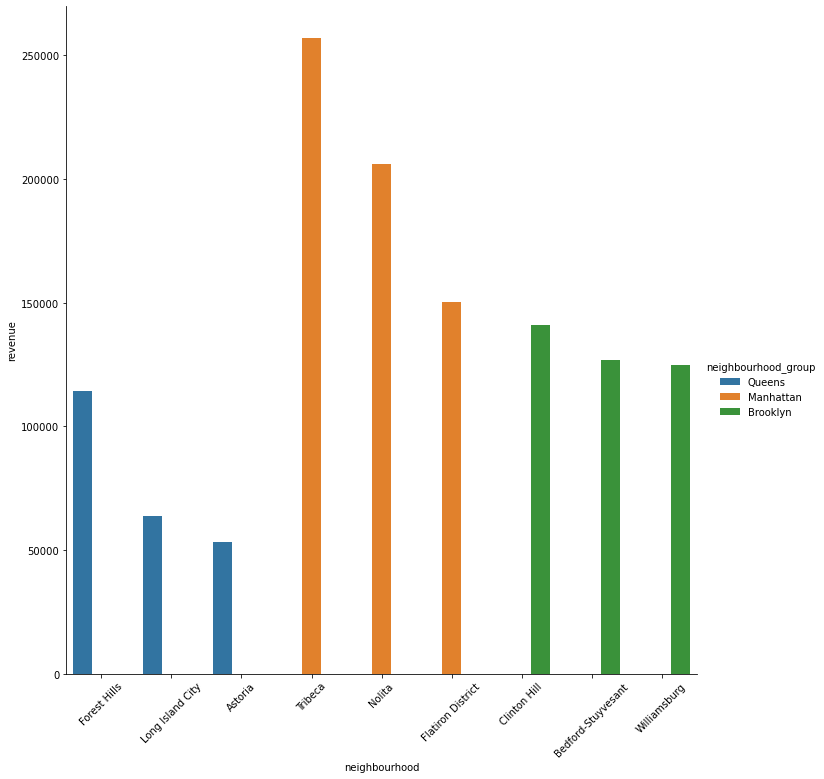

In [11]:
challenge2 = sns.catplot(data=challenge1_df, kind='bar', x='neighbourhood', y='revenue', hue='neighbourhood_group', height=10)
challenge2.set_xticklabels(labels=challenge1_df['neighbourhood'], rotation=45)
plt.show()